In [31]:
#Assignment 2---------------------------------------------
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
d=pd.read_csv('happydata.csv')
d.head()


,infoavail,housecost,schoolquality,policetrust,streetquality,ëvents,happy
0,3,3,3,4,2,4,0
1,3,2,3,5,4,3,0
2,5,3,3,3,3,5,1
3,5,4,3,3,3,5,0
4,5,4,3,3,3,5,0


In [12]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   infoavail      143 non-null    int64
 1   housecost      143 non-null    int64
 2   schoolquality  143 non-null    int64
 3   policetrust    143 non-null    int64
 4   streetquality  143 non-null    int64
 5   ëvents         143 non-null    int64
 6   happy          143 non-null    int64
dtypes: int64(7)
memory usage: 7.9 KB


In [13]:
d['happy'].value_counts()

1    77
0    66
Name: happy, dtype: int64

<Axes: xlabel='happy', ylabel='count'>

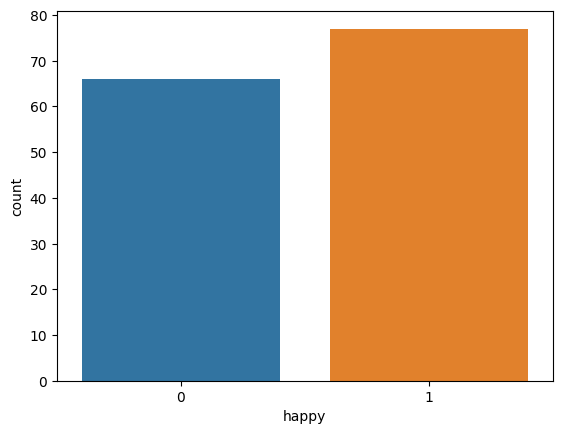

In [14]:
sns.countplot(data=d,x='happy')

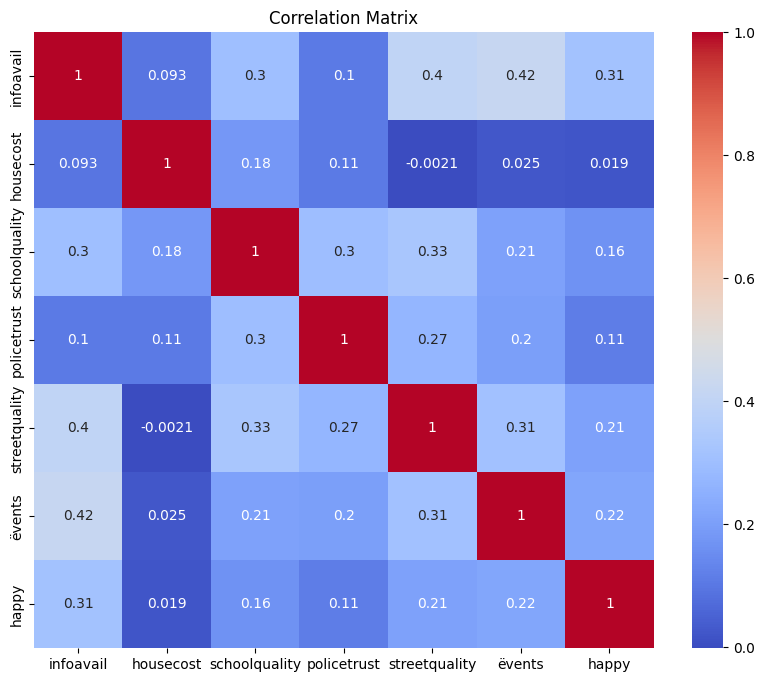

In [15]:
#heatmap
# Calculate the correlation matrix
correlation_matrix = d.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [16]:
d['schoolquality'].value_counts()

3    65
4    36
2    18
5    17
1     7
Name: schoolquality, dtype: int64

In [17]:
#split for traing and testing
X = d.drop('happy', axis=1)
y = d[['happy']]

In [18]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(100, 6) (43, 6) (100, 1) (43, 1)


In [19]:
#Logistic Regression------------------
lr=LogisticRegression()

In [20]:
lr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [21]:
lr.predict([[3, 3, 3, 4, 2, 4]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [22]:
y_pred = lr.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy using Logistic Regression:", accuracy*100)

Accuracy using Logistic Regression: 65.11627906976744


In [23]:
from sklearn.svm import SVC

In [24]:
#SVM using Linear Kernel
s=SVC()

In [25]:
#C is the SVM Regularization parameter
#C=1.0
linear_s=SVC(kernel='linear', C=1.0)
linear_s.fit(X_train,y_train)
y_pred_test=linear_s.predict(X_test)
print('C=1.0 Model accuracy with linear kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)*100))

C=1.0 Model accuracy with linear kernel : 58.1395


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
#SVM classifier using Polynomial Kernel
poly_svc = SVC(kernel='poly',C=100.0)
poly_svc.fit(X_train, y_train)

y_pred = poly_svc.predict(X_test)

print('Model accuracy with Ploynomial kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred)*100))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model accuracy with Ploynomial kernel : 46.5116


In [27]:
#SVM classifier using Gaussian kernel
Gaus_svc = SVC(kernel ='rbf', C = 100.0)
Gaus_svc.fit(X_train, y_train)

y_pred1=Gaus_svc.predict(X_test)

print('Model accuracy with Gausian kernel : {0:0.4f}'. format(accuracy_score(y_test, y_pred1)*100))

Model accuracy with Gausian kernel : 53.4884


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
#LogisticRegression using SGD--------------
c_SGD = SGDClassifier(loss='log', max_iter=100) # create a classifier using logistic regression using SGD
c_SGD.fit(X_train, y_train) # fit the model on the training data
y_pred2 = c_SGD.predict(X_test) # predict values on test set

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
#Model Accuracy
print('Model accuracy with SGD : {0:0.4f}'. format(accuracy_score(y_test, y_pred2)*100))

Model accuracy with SGD : 44.1860


In [33]:
#Perceptron--------------
p = Perceptron(max_iter=5)
p.fit(X_train, y_train)

y_pred3 = p.predict(X_test)

acc_perceptron = round(p.score(X_train, y_train) * 100, 2)
print(round(acc_perceptron,2,), "%")
#print('Model accuracy with Perceptron : {0:0.4f}'. format(accuracy_score(y_test, y_pred3)*100))

47.0 %


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
